In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
age_BA = pd.read_csv('./gastro review table through ages.csv', index_col=0)
age_BA

,Tauro-CA-sulfate,Ala-CA,Tauro-CA,Gly-CDCA,Tetra hydroxy bile acid,CA,HCA,Phe-CA,His-CA,Trp-CA,LCA,Tyr-DCA,Phe-DCA
<2 yrs,0.770992,0.754098,0.637255,0.511278,0.504950,0.390244,0.378788,0.190476,0.178808,0.107143,0.055046,0.025641,0.021552
2 to 7 yrs,0.000000,0.000000,0.122549,0.097744,0.118812,0.121951,0.106061,0.047619,0.000000,0.294643,0.275229,0.000000,0.000000
8 to 17 yrs,0.061069,0.000000,0.102941,0.030075,0.138614,0.146341,0.113636,0.059524,0.278146,0.214286,0.216514,0.000000,0.000000
18 to 44 yrs,0.000000,0.016393,0.049020,0.090226,0.059406,0.048780,0.147727,0.071429,0.000000,0.223214,0.155963,0.102564,0.116379
45 to 65 yrs,0.000000,0.049180,0.049020,0.225564,0.079208,0.048780,0.234848,0.035714,0.000000,0.098214,0.256881,0.000000,0.043103
>65 yrs,0.167939,0.180328,0.039216,0.045113,0.099010,0.243902,0.018939,0.595238,0.543046,0.062500,0.040367,0.871795,0.818966


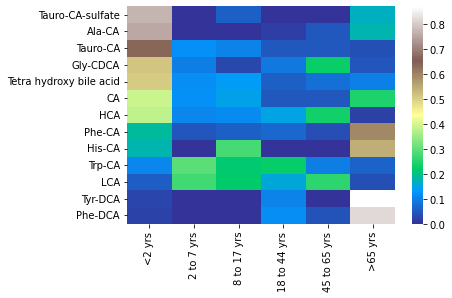

In [4]:
sns.heatmap(data=age_BA.T, cmap='terrain')
plt.savefig('./heatmap.png', dpi=150, bbox_inches='tight')

In [5]:
table = pd.melt(age_BA, value_vars=age_BA.columns, ignore_index=False)
table2 = table.reset_index()
table2

,index,variable,value
0,<2 yrs,Tauro-CA-sulfate,0.770992
1,2 to 7 yrs,Tauro-CA-sulfate,0.000000
2,8 to 17 yrs,Tauro-CA-sulfate,0.061069
3,18 to 44 yrs,Tauro-CA-sulfate,0.000000
4,45 to 65 yrs,Tauro-CA-sulfate,0.000000
...,...,...,...
73,2 to 7 yrs,Phe-DCA,0.000000
74,8 to 17 yrs,Phe-DCA,0.000000
75,18 to 44 yrs,Phe-DCA,0.116379
76,45 to 65 yrs,Phe-DCA,0.043103


In [6]:
import altair as alt
import altair_saver
from vega_datasets import data

alt.Chart(table2).mark_area().encode(
    alt.X('index:N',
        axis=alt.Axis(domain=False, tickSize=0), 
          sort=['<2 yrs', '2 to 7 yrs', '8 to 17 yrs', '18 to 44 yrs', '45 to 65 yrs', '>65 yrs']
    ),
    alt.Y('value:Q', stack='center', axis=None),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()
#).save('./altair_BAchart.svg', scale_factor=2.0)



alt.Chart(...)

In [13]:
table2.variable.unique()

array(['Tauro-CA-sulfate', 'Ala-CA', 'Tauro-CA', 'Gly-CDCA',
       'Tetra hydroxy bile acid', 'CA', 'HCA', 'Phe-CA', 'His-CA',
       'Trp-CA', 'LCA', 'Tyr-DCA', 'Phe-DCA'], dtype=object)

In [24]:
alt.Chart(table2).mark_area().encode(
    alt.X('index:N',
        axis=alt.Axis(domain=False, tickSize=0), 
          sort=['<2 yrs', '2 to 7 yrs', '8 to 17 yrs', '18 to 44 yrs', '45 to 65 yrs', '>65 yrs']
    ),
    alt.Y('value:Q', stack='normalize', axis=None),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='turbo'),
        sort=[ 'CA', 'HCA', 'LCA',
            'Tauro-CA', 'Tauro-CA-sulfate', 'Gly-CDCA',
              'Ala-CA', 'His-CA', 'Phe-CA', 'Trp-CA', 'Phe-DCA', 'Tyr-DCA',
              'Tetra hydroxy bile acid']
    )
).interactive()

alt.Chart(...)

# The hard way

In [7]:
age_BA.columns

Index(['Tauro-CA-sulfate', 'Ala-CA', 'Tauro-CA', 'Gly-CDCA',
       'Tetra hydroxy bile acid', 'CA', 'HCA', 'Phe-CA', 'His-CA', 'Trp-CA',
       'LCA', 'Tyr-DCA', 'Phe-DCA'],
      dtype='object')

In [8]:
age_BA["sum"] = age_BA.sum(axis=1)
age_BA_tsn = age_BA.loc[:,'Tauro-CA-sulfate':'Phe-DCA'].div(age_BA["sum"], axis=0)

In [9]:
age_BA_tsn

,Tauro-CA-sulfate,Ala-CA,Tauro-CA,Gly-CDCA,Tetra hydroxy bile acid,CA,HCA,Phe-CA,His-CA,Trp-CA,LCA,Tyr-DCA,Phe-DCA
<2 yrs,0.170337,0.166605,0.140790,0.112958,0.111560,0.086218,0.083687,0.042082,0.039504,0.023671,0.012161,0.005665,0.004761
2 to 7 yrs,0.000000,0.000000,0.103451,0.082512,0.100296,0.102946,0.089532,0.040198,0.000000,0.248726,0.232338,0.000000,0.000000
8 to 17 yrs,0.044866,0.000000,0.075628,0.022095,0.101836,0.107513,0.083486,0.043731,0.204347,0.157430,0.159067,0.000000,0.000000
18 to 44 yrs,0.000000,0.015164,0.045342,0.083457,0.054949,0.045121,0.136645,0.066070,0.000000,0.206469,0.144263,0.094870,0.107649
45 to 65 yrs,0.000000,0.043891,0.043747,0.201304,0.070689,0.043534,0.209590,0.031873,0.000000,0.087651,0.229253,0.000000,0.038468
>65 yrs,0.045068,0.048393,0.010524,0.012106,0.026570,0.065453,0.005083,0.159737,0.145731,0.016772,0.010833,0.233954,0.219776


In [10]:
ttable = pd.melt(age_BA_tsn, value_vars=age_BA_tsn.columns, ignore_index=False)
ttable2 = ttable.reset_index()
ttable2.head()

,index,variable,value
0,<2 yrs,Tauro-CA-sulfate,0.170337
1,2 to 7 yrs,Tauro-CA-sulfate,0.000000
2,8 to 17 yrs,Tauro-CA-sulfate,0.044866
3,18 to 44 yrs,Tauro-CA-sulfate,0.000000
4,45 to 65 yrs,Tauro-CA-sulfate,0.000000


In [11]:
import altair as alt
import altair_saver
from vega_datasets import data

alt.Chart(ttable2).mark_area().encode(
    alt.X('index:N',
        axis=alt.Axis(domain=False, tickSize=0), 
          sort=['<2 yrs', '2 to 7 yrs', '8 to 17 yrs', '18 to 44 yrs', '45 to 65 yrs', '>65 yrs']
    ),
    alt.Y('value:Q', stack='center', axis=None),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()
#).save('./altair_BAchart_tsn.svg', scale_factor=2.0)

alt.Chart(...)

<function matplotlib.pyplot.show(close=None, block=None)>

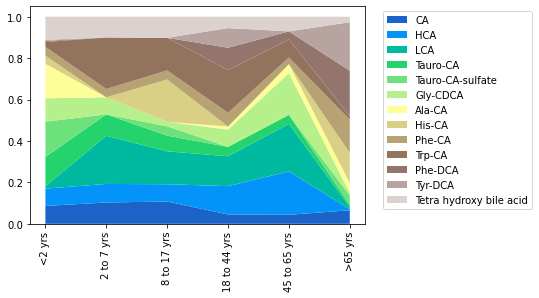

In [39]:
x = age_BA_tsn.index

labelz = [ 'CA', 'HCA', 'LCA',
            'Tauro-CA', 'Tauro-CA-sulfate', 'Gly-CDCA',
              'Ala-CA', 'His-CA', 'Phe-CA', 'Trp-CA', 'Phe-DCA', 'Tyr-DCA',
              'Tetra hydroxy bile acid']
y1 = age_BA_tsn['CA'].values
y2 = age_BA_tsn['HCA'].values
y3 = age_BA_tsn['LCA'].values
y4 = age_BA_tsn['Tauro-CA'].values
y5 = age_BA_tsn['Tauro-CA-sulfate'].values
y6 = age_BA_tsn['Gly-CDCA'].values
y7 = age_BA_tsn['Ala-CA'].values
y8 = age_BA_tsn['His-CA'].values
y9 = age_BA_tsn['Phe-CA'].values
y10 = age_BA_tsn['Trp-CA'].values
y11 = age_BA_tsn['Phe-DCA'].values
y12 = age_BA_tsn['Tyr-DCA'].values
y13 = age_BA_tsn['Tetra hydroxy bile acid'].values

clrs = sns.color_palette("terrain", 13)

plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, 
              labels=labelz, colors=clrs)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('./tsn_visualization_matplotlib.svg', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

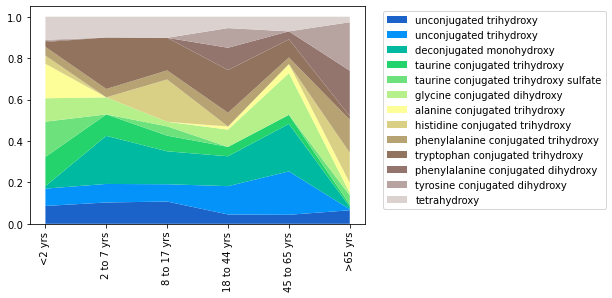

In [40]:
x = age_BA_tsn.index

labelz = [ 'unconjugated trihydroxy', 'unconjugated trihydroxy', 'deconjugated monohydroxy',
            'taurine conjugated trihydroxy', 'taurine conjugated trihydroxy sulfate', 'glycine conjugated dihydroxy',
              'alanine conjugated trihydroxy', 'histidine conjugated trihydroxy', 
          'phenylalanine conjugated trihydroxy', 'tryptophan conjugated trihydroxy', 
          'phenylalanine conjugated dihydroxy', 'tyrosine conjugated dihydroxy',
              'tetrahydroxy']
y1 = age_BA_tsn['CA'].values
y2 = age_BA_tsn['HCA'].values
y3 = age_BA_tsn['LCA'].values
y4 = age_BA_tsn['Tauro-CA'].values
y5 = age_BA_tsn['Tauro-CA-sulfate'].values
y6 = age_BA_tsn['Gly-CDCA'].values
y7 = age_BA_tsn['Ala-CA'].values
y8 = age_BA_tsn['His-CA'].values
y9 = age_BA_tsn['Phe-CA'].values
y10 = age_BA_tsn['Trp-CA'].values
y11 = age_BA_tsn['Phe-DCA'].values
y12 = age_BA_tsn['Tyr-DCA'].values
y13 = age_BA_tsn['Tetra hydroxy bile acid'].values

clrs = sns.color_palette("terrain", 13)

plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, 
              labels=labelz, colors=clrs)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig('./tsn_visualization_matplotlib2.svg', dpi=300, bbox_inches='tight')
plt.show

In [42]:
age_BA_tsn['unconjugated trihydroxy'] = age_BA_tsn[['CA', 'HCA']].sum(axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

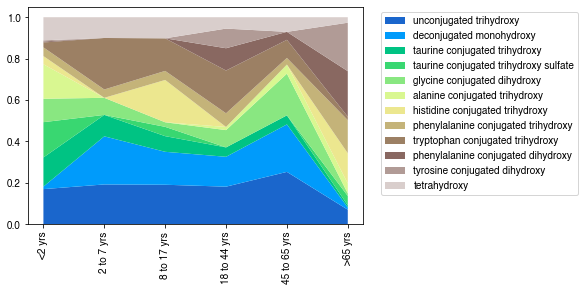

In [45]:
x = age_BA_tsn.index

labelz = [ 'unconjugated trihydroxy', 'deconjugated monohydroxy',
            'taurine conjugated trihydroxy', 'taurine conjugated trihydroxy sulfate', 'glycine conjugated dihydroxy',
              'alanine conjugated trihydroxy', 'histidine conjugated trihydroxy', 
          'phenylalanine conjugated trihydroxy', 'tryptophan conjugated trihydroxy', 
          'phenylalanine conjugated dihydroxy', 'tyrosine conjugated dihydroxy',
              'tetrahydroxy']
y1 = age_BA_tsn['unconjugated trihydroxy'].values
y3 = age_BA_tsn['LCA'].values
y4 = age_BA_tsn['Tauro-CA'].values
y5 = age_BA_tsn['Tauro-CA-sulfate'].values
y6 = age_BA_tsn['Gly-CDCA'].values
y7 = age_BA_tsn['Ala-CA'].values
y8 = age_BA_tsn['His-CA'].values
y9 = age_BA_tsn['Phe-CA'].values
y10 = age_BA_tsn['Trp-CA'].values
y11 = age_BA_tsn['Phe-DCA'].values
y12 = age_BA_tsn['Tyr-DCA'].values
y13 = age_BA_tsn['Tetra hydroxy bile acid'].values

clrs = sns.color_palette("terrain", 12)

plt.stackplot(x,y1, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, 
              labels=labelz, colors=clrs)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./tsn_visualization_matplotlib2.svg', dpi=300, bbox_inches='tight')
plt.show